In [1]:
from PIL import Image, ImageChops
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [2]:
X_train = pd.read_csv('./data/train_x.csv')
X_test = pd.read_csv('./data/test_x.csv')
y_train = pd.read_csv('./data/train_y.csv')
y_test = pd.read_csv('./data/test_y.csv')

In [15]:
target_size = (24, 24)

def trim(image, idx):
    im = Image.fromarray(pd.Series(image).values.reshape((64,64)).astype(np.uint8))
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im.convert('L'), bg.convert('L'))
    diff = ImageChops.add(diff, diff, 2.0, -50)
    bbox = diff.getbbox()
    if bbox:
        resized = pd.Series(np.array(im.crop(bbox).resize(target_size)).flatten())
        return resized
    else:
        print(f'CROPPING FAILED FOR INDEX: {idx}')
        im = Image.fromarray(pd.Series(image).values.reshape((64,64)).astype(np.uint8))
        resized = pd.Series(np.array(im.resize(target_size)).flatten())
        return resized

In [45]:
# create new datasets of whitespace cropped images

for dataset in [(X_train, 'train_x'), (X_test, 'test_x')]:
    for idx, row in enumerate(dataset[0].itertuples(index=False)):
        with open(f'./data/preprocessing/{dataset[1]}_{target_size[0]}x{target_size[1]}.csv', 'a') as f:
            x = trim(row, idx) 
            df = pd.DataFrame([x])
            df.to_csv(f, mode='a', header=False, index=False)

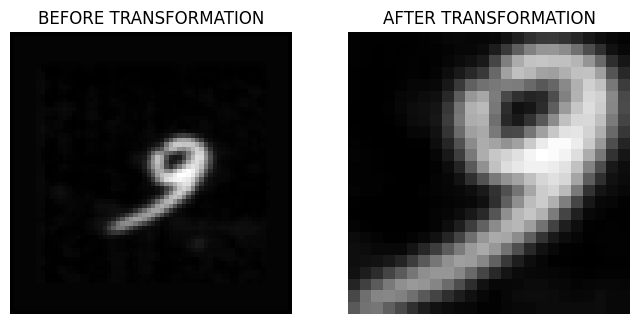

In [43]:
# testing the whitespace and cropping

idx = 49000

img_dir = f'./images/preprocessing/{target_size[0]}x{target_size[1]}'
plot_dir = f'./images/whitespace_cropping'

os.makedirs(img_dir, exist_ok=True)

im = X_train.iloc[idx].values
im_before = Image.fromarray(pd.Series(im).values.reshape((64,64)).astype(np.uint8))
im_before.save(img_dir + f'/{idx}_64x64_before.png', format='PNG')

im = trim(im, idx)
im = Image.fromarray(im.values.reshape(target_size))
im.save(img_dir + f'/{idx}_{target_size[0]}x{target_size[1]}_after.png', format='PNG')

# Create figure and axes for two subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # Width, Height

# Show 'before' image
axes[0].imshow(im_before, cmap="gray_r")
axes[0].set_title('BEFORE TRANSFORMATION')
axes[0].axis('off')  # Hide the axes

# Show 'after' image
axes[1].imshow(im, cmap="gray_r")
axes[1].set_title('AFTER TRANSFORMATION')
axes[1].axis('off')  # Hide the axes

plt.show()
fig.savefig(f'{plot_dir}/{idx}_64_to_{target_size[0]}_before_after.png', format='png', dpi=300)